In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [29]:
df.shape

(1000, 3)

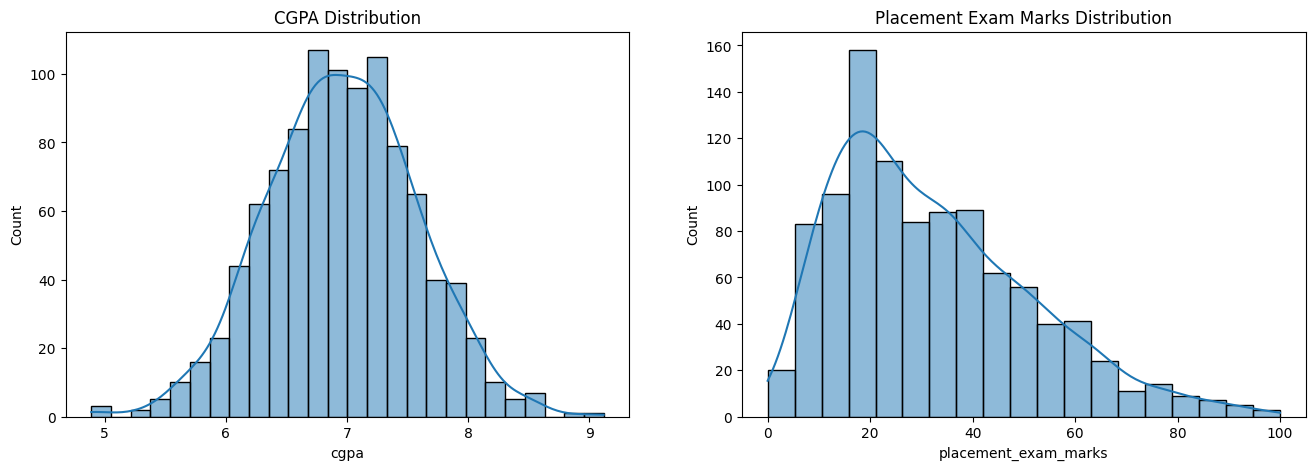

In [5]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Placement Exam Marks Distribution')

plt.show()


In [9]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

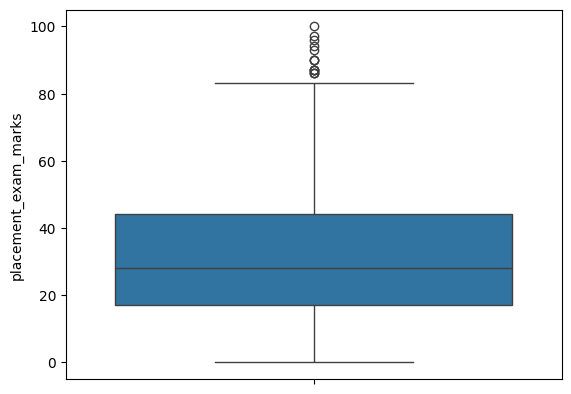

In [10]:
sns.boxplot(df['placement_exam_marks'])

In [14]:
percentile75=df['placement_exam_marks'].quantile(0.75)
percentile25=df['placement_exam_marks'].quantile(0.25)

In [15]:
iqr=percentile75-percentile25
iqr

np.float64(27.0)

In [18]:
lower_limit=percentile25-1.5*iqr
lower_limit

np.float64(-23.5)

In [20]:
upper_limit=percentile75+1.5*iqr
upper_limit

np.float64(84.5)

### finding outliers

In [24]:
outliers = df[
    (df['placement_exam_marks'] >= upper_limit) |
    (df['placement_exam_marks'] <= lower_limit)
]
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## trimming


In [30]:
new_df = df[
    (df['placement_exam_marks'] < upper_limit) &
    (df['placement_exam_marks'] > lower_limit)
]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


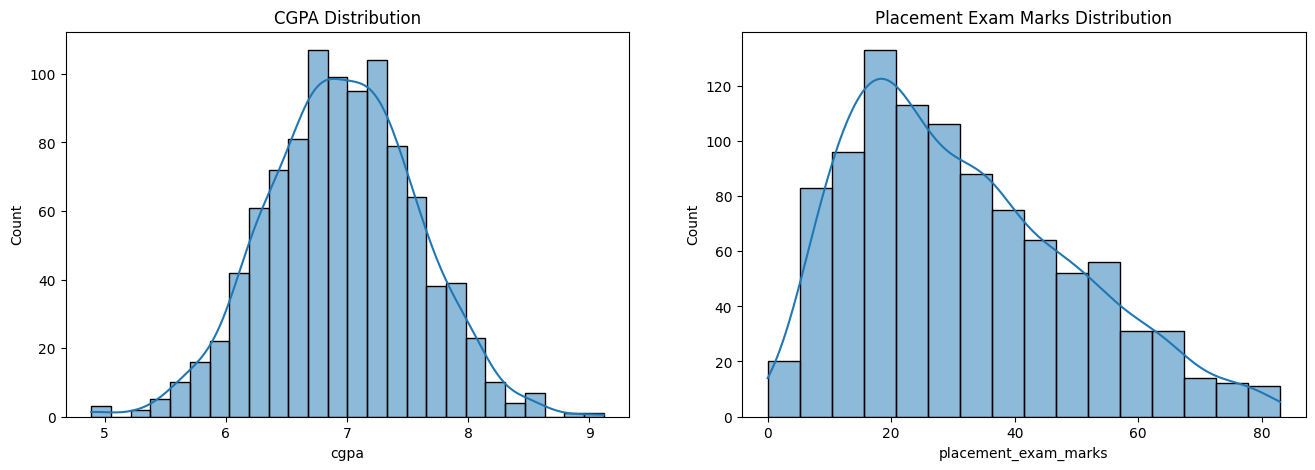

<Axes: ylabel='placement_exam_marks'>

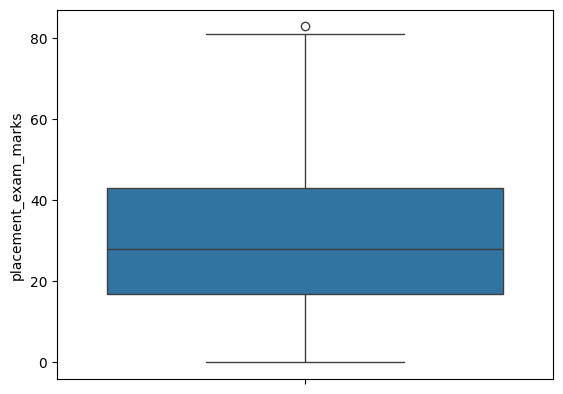

In [36]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(new_df['cgpa'], kde=True)
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.histplot(new_df['placement_exam_marks'], kde=True)
plt.title('Placement Exam Marks Distribution')

plt.show()
sns.boxplot(new_df['placement_exam_marks'])

### capping


In [45]:
new_df_cap = df.copy()

In [46]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
            new_df_cap['placement_exam_marks']<lower_limit,
            lower_limit,
             new_df_cap['placement_exam_marks']
                )
        )

        

In [47]:
new_df_cap.shape

(1000, 3)

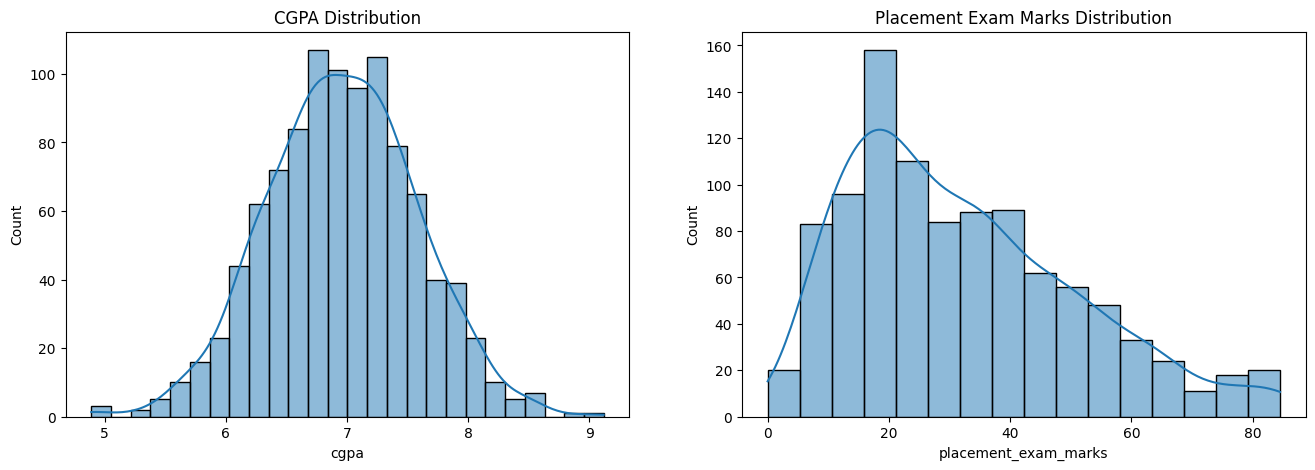

<Axes: ylabel='placement_exam_marks'>

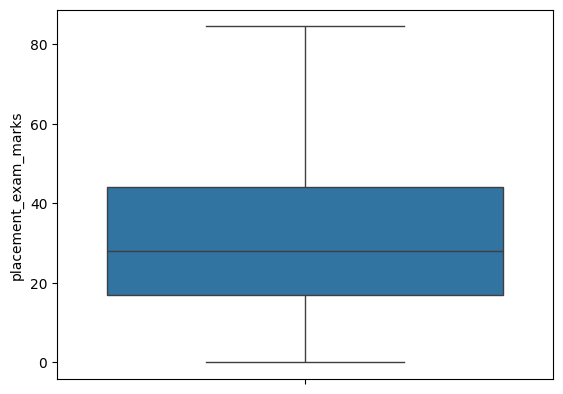

In [48]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(new_df_cap['cgpa'], kde=True)
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True)
plt.title('Placement Exam Marks Distribution')

plt.show()
sns.boxplot(new_df_cap['placement_exam_marks'])